# Import Basics of Code

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Loading datasets

In [347]:
items_df = pd.read_csv('../datasets/items.csv')
users_df = pd.read_csv('../datasets/users.csv')

In [348]:
items_df.head()

,شناسه کالا,دسته‌بندی,رنگ,متریال,سبک طراحی,کاربرد,جنسیت
0,1,خانه و دکور,تیره و لوکس,چوبی,لوکس و رسمی,کاری,مردانه
1,2,کتاب و محصولات آموزشی,اصلی,ترکیبی,کلاسیک,شخصی,مردانه
2,3,لوازم سفر و گردشگری,طبیعی,خاص,کلاسیک,شخصی,مردانه
3,4,زیبایی و بهداشت,تیره و لوکس,پارچه,کلاسیک,شخصی,زنانه
4,5,کتاب و محصولات آموزشی,خنثی,پارچه,لوکس و رسمی,شخصی,مردانه


In [349]:
users_df.head()


,شناسه کاربر,سن,جنسیت,اولویت دسته‌بندی 1,اولویت دسته‌بندی 2,اولویت دسته‌بندی 3,ویژگی روان‌شناختی,علاقه به متریال,سبک کاری مورد علاقه,مناسبت هدیه,نوع ارتباط با فرد گیرنده هدیه
0,1,25,مرد,پازل‌ها و بازی‌ها,الکترونیک,پازل‌ها و بازی‌ها,ماجراجو و ورزشکار,شیشه و سرامیک,مدرن,مناسبت فردی,همسر
1,2,31,مرد,ورزش و تناسب اندام,لوازم سفر و گردشگری,پوشاک و اکسسوری,برون‌گرا,پلاستیک,هنری,مناسبت فردی,آشنا
2,3,58,مرد,پوشاک و اکسسوری,خانه و دکور,ورزش و تناسب اندام,برون‌گرا,ترکیبی,کلاسیک,مناسبت فردی,همسر
3,4,47,مرد,لوازم سفر و گردشگری,پازل‌ها و بازی‌ها,پوشاک و اکسسوری,منطقی و تحلیل‌گر,پارچه,هنری,ارتقا کاری,پارتنر
4,5,13,زن,زیبایی و بهداشت,خانه و دکور,الکترونیک,ماجراجو و ورزشکار,فلزات,فانتزی و خاص,سالگرد,دوست


In [350]:
items_df = items_df.drop(columns = ['شناسه کالا'])

In [351]:
for col in items_df.columns:
    le = LabelEncoder()

    items_df[col] = le.fit_transform(items_df[col])

items_df.head()

,دسته‌بندی,رنگ,متریال,سبک طراحی,کاربرد,جنسیت
0,1,1,6,2,6,2
1,7,0,0,6,5,2
2,3,5,1,6,5,2
3,2,1,4,6,5,1
4,7,3,4,2,5,2


In [352]:
items_df.describe()

,دسته‌بندی,رنگ,متریال,سبک طراحی,کاربرد,جنسیت
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,2.580000,3.226667,3.471111,3.746667,4.124444,1.484444
std,2.503281,1.887056,1.853261,2.197954,1.535788,0.671386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,2.000000,3.000000,1.000000
50%,2.000000,3.000000,4.000000,4.000000,5.000000,2.000000
75%,5.000000,5.000000,4.000000,6.000000,5.000000,2.000000
max,7.000000,6.000000,6.000000,6.000000,6.000000,2.000000


In [353]:
users_df = users_df.drop(columns = ['شناسه کاربر'])

In [354]:
for col in users_df.columns:
    if users_df[col].dtype == 'int':
        continue
    le = LabelEncoder()

    users_df[col] = le.fit_transform(users_df[col])


users_df.head()

,سن,جنسیت,اولویت دسته‌بندی 1,اولویت دسته‌بندی 2,اولویت دسته‌بندی 3,ویژگی روان‌شناختی,علاقه به متریال,سبک کاری مورد علاقه,مناسبت هدیه,نوع ارتباط با فرد گیرنده هدیه
0,21,1,5,0,5,5,2,3,6,4
1,27,1,4,3,6,1,5,5,6,0
2,53,1,6,1,4,1,0,6,6,4
3,43,1,3,5,6,6,4,5,0,6
4,11,0,2,1,0,5,3,1,4,3


In [355]:
# def age_mapping(age):
#     if 0 < age <= 10:
#         return 0
#     elif 10 < age <= 20:
#         return 1
#     elif 20 < age <= 30:
#         return 2
#     elif 30 < age <= 40:
#         return 3
#     elif 40 < age <= 50:
#         return 4
#     else:
#         return 5
    
# users_df['سن'] = users_df['سن'].apply(age_mapping)
# users_df.head()

# Model Architecture

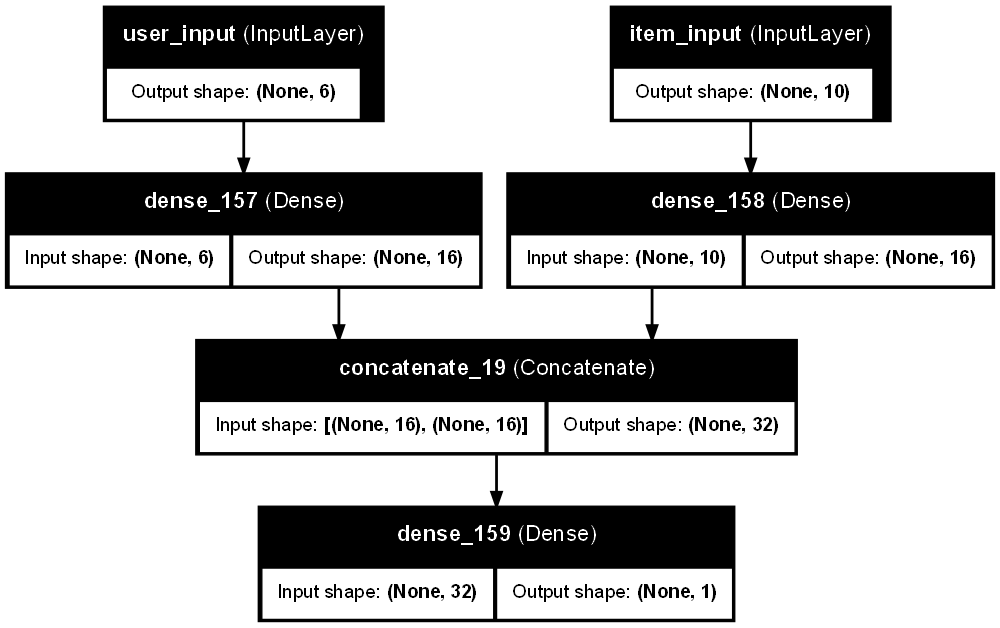

In [385]:
input_user = layers.Input(shape = (6,), name = "user_input")
input_item = layers.Input(shape = (10,), name = "item_input")

user_dense = layers.Dense(16, activation = 'relu')(input_user)

items_dense = layers.Dense(16, activation='relu')(input_item)

merged = layers.concatenate([user_dense, items_dense])
out = layers.Dense(1, activation = 'sigmoid')(merged)

model = keras.Model(inputs = [input_user, input_item], outputs = out)

keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, dpi = 100)

In [386]:
y = np.random.choice([0, 1], size=users_df.shape[0] * items_df.shape[0])
y.reshape(-1, 1)
users_df_expanded = users_df.loc[users_df.index.repeat(items_df.shape[0])].reset_index(drop = True)
items_df_expanded = pd.concat([items_df] * users_df.shape[0], ignore_index = True)

In [387]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit([items_df_expanded,users_df_expanded], y, epochs = 1, batch_size=8)

8438/8438 ━━━━━━━━━━━━━━━━━━━━ 6s 636us/step - accuracy: 0.4993 - loss: 0.8096


In [408]:
#User Random Prediction
age = np.random.randint(1, 71)
gender = np.random.randint(0, 2)
category1 = np.random.randint(0, 8)
category2 = np.random.randint(0, 8)
category3 = np.random.randint(0, 8)
mental = np.random.randint(0, 7)
material = np.random.randint(0, 7)
design = np.random.randint(0, 7)
occasion = np.random.randint(0, 7)
relationship = np.random.randint(0, 7)

sample_user = np.concatenate(([age], [gender], [category1], [category2], [category3],
                               [mental], [material], [design], [occasion], [relationship]))
# Items Random Prediction
category = np.random.randint(0, 8)
color = np.random.randint(0, 7)
material = np.random.randint(0, 7)
design = np.random.randint(0, 7)
use_ = np.random.randint(0, 7)
gender = np.random.randint(0, 3)

sample_item = np.concatenate(([category], [color], [material], [design], [use_], [gender]))

sample_user = sample_user.reshape(1, 10)
sample_item = sample_item.reshape(1, 6)
print(sample_user)
print(sample_item)
prediction = model.predict([sample_item, sample_user])
print(prediction)

[[13  1  4  7  5  4  4  0  2  5]]
[[3 3 5 3 4 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.5034652]]


In [389]:
sample_user = sample_user.reshape(1, 10)
sample_item = sample_item.reshape(1, 6)

In [361]:
prediction = model.predict([sample_item, sample_user])
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.5832658]]
